In [11]:
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt


In [22]:

def loadData(path):
    listOfFiles = os.listdir(path='E:\asl_alphabet_test')
    train = []
    train_labels = []
        

In [23]:
print("Training files = ",listOfFiles[1:27])
    for file in listOfFiles[1:27]:
        with open(path+file,'rb') as fo:
            dict = pickle.load(fo,encoding='bytes')
            train.append(dict[b'data'])
            train_labels.append(dict[b'labels'])

    dictData = {}
    dictData['train_data'] = np.reshape(np.array(train),newshape=(np.array(train).shape[0]*np.array(train).shape[1],np.array(train).shape[2]))
    dictData['train_labels'] = np.reshape(np.array(train_labels),newshape=(np.array(train_labels).shape[0]*np.array(train_labels).shape[1]))
    return dictData

IndentationError: unexpected indent (<ipython-input-23-ec371e70968a>, line 2)

In [24]:
dataset = loadData(path='E:\asl_alphabet_test')


dataset['train_data'].shape[0]


#visualizing train sample
temp = dataset['train_data'][49000]
label = dataset['train_labels'][49000]

#representing RGB values
R = temp[0:1024].reshape(32,32)
G = np.reshape(temp[1024:2048],newshape=(32,32))
B = np.reshape(temp[2048:],newshape=(32,32))
temp = np.dstack((R,G,B))  
plt.imshow(temp)
plt.xticks([])
plt.yticks([])
plt.xlabel(label)
plt.show()

OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: 'E:\x07sl_alphabet_test'

In [25]:
X_train, y_train= dataset['train_data'],dataset['train_labels']

NameError: name 'dataset' is not defined

In [27]:
class kNearestNeighbour(object):
    def __init__(self):
        pass
    
    def train(self,X,Y):
        #Knn will remember all of its training data
        self.Xtr = X
        self.Ytr = Y
        
    def predict(self,X,k):
       
        test_samples = X.shape[0]
        
        Ypred = np.zeros(test_samples,dtype=self.Ytr.dtype)
        

In [30]:
  for i in range(test_samples):
            print("Test example = ",i,end="\n")
            
            
            label_count = np.zeros(10,dtype=self.Ytr.dtype)    
            dist = np.sum(np.abs(X[i,:] - self.Xtr),axis=1)  horizontally across columns
            
           
            idx = np.argpartition(dist,k)
            min_ind = idx[:k]
            
            #iterates over min_ind 
            #Max value at any index returned using np.argmax()
            for x in min_ind:
                label_count[int(self.Ytr[x])] +=1
            Ypred[i] = np.argmax(label_count)


SyntaxError: invalid syntax (<ipython-input-30-964e637806c7>, line 6)

In [31]:

num_folds = 5
num_training = 50000

k_choices = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]


In [32]:
if num_training/num_folds % num_folds != 0.0:
    raise ValueError('Number of training examples not evenly divisible by number of folds.')


In [33]:
X_train_folds = np.split(X_train, num_folds)
y_train_folds = np.split(y_train, num_folds)



NameError: name 'X_train' is not defined

In [34]:
k_to_accuracies = {}


In [35]:
for k in range(1,20):
    k_to_accuracies[k] = []
    

In [36]:
for idx in range(num_folds):
    # Use bin with index idx as validation set
    X_train_set = np.concatenate((*X_train_folds[:idx], *X_train_folds[idx+1:]), axis=0)
    y_train_set = np.concatenate((*y_train_folds[:idx], *y_train_folds[idx+1:]), axis=0)
    X_validation_set = X_train_folds[idx]
    y_validation_set = y_train_folds[idx]   
    num_validation_set = X_validation_set.shape[0]

NameError: name 'X_train_folds' is not defined

In [37]:
 knn = kNearestNeighbour()
    knn.train(X_train_set, y_train_set)

IndentationError: unexpected indent (<ipython-input-37-6b9b61f02082>, line 2)

In [38]:
for k in k_choices:
        # Predict labels for validation set
        y_validation_pred = knn.predict(X_validation_set,k)
        # Check accuracy
        accuracy = (float(np.sum(np.equal(y_validation_pred, y_validation_set)))/num_validation_set)
        k_to_accuracies[k].append(accuracy)


NameError: name 'knn' is not defined

In [39]:
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))



C:\Users\Asus\anaconda3\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


k = 1, average accuracy = nan
k = 2, average accuracy = nan
k = 3, average accuracy = nan
k = 4, average accuracy = nan
k = 5, average accuracy = nan
k = 6, average accuracy = nan
k = 7, average accuracy = nan
k = 8, average accuracy = nan
k = 9, average accuracy = nan
k = 10, average accuracy = nan
k = 11, average accuracy = nan
k = 12, average accuracy = nan
k = 13, average accuracy = nan
k = 14, average accuracy = nan
k = 15, average accuracy = nan
k = 16, average accuracy = nan
k = 17, average accuracy = nan
k = 18, average accuracy = nan
k = 19, average accuracy = nan


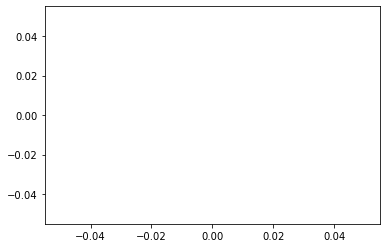

In [40]:
for k in range(1,20):
    accuracies = k_to_accuracies[k]
    print('k = %d, average accuracy = %f' % (k, np.average(accuracies)))
    plt.scatter([k] * len(accuracies), accuracies)

C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Asus\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


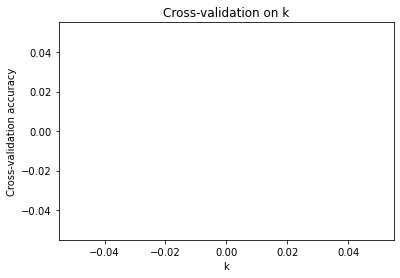

In [41]:
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(range(1,20), accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()
